Thành viên nhóm :

   Huỳnh Thiên Long - 18133025 
   
   Phan Thành Trung - 18133059
#  Đề xuất:
  Giới thiệu:
+ Tên Đề Tài:  Phân tích các yếu tố ảnh hưởng đến rating của ứng dụng trên google play store
+ Tải về từ https://www.kaggle.com/lava18/google-play-store-apps
+ Nguồn thu thập dữ liệu: Google Play Store
+ Ý tưởng:  Hiện nay nhu cầu sử dụng các ứng dụng tiện ích ngày càng nhiều, do đó thúc đẩy sự phát triển của việc sản xuất ứng dụng di động.Dữ liệu thống kê này có thể cho các nhà phát triển những thông tin quan trọng để nắm bắt thị trường từ đó đưa ra những kế hoạch sản xuất trong tương lai.
+ Đối tượng dữ liệu là các ứng dụng trên Google Play Store
+ Gồm 13 cột và 10842 dòng
+ Các biến phân loại : Category, Type, Content Rating, Genres, Last Updated, Current Ver, Android Ver
+ Các biến số: Rating, Reviews, Price, Installs



## 2. Dữ liệu:
Tập dữ liệu đầu vào được tìm thấy trên Kaggle và thông tin được thu thập thông qua việc tìm kiếm trên web khoảng 10.000 ứng dụng Cửa hàng Play. Vì Google Play sử dụng các kỹ thuật hiện đại như tải trang động bằng JQuery, điều này khiến việc tìm kiếm khó khăn hơn. Mỗi ứng dụng có các giá trị cho danh mục, xếp hạng, kích thước, lượt cài đặt và các thông số kỹ thuật ứng dụng khác. Mặc dù Google Play cũng hoạt động như một cửa hàng phương tiện kỹ thuật số,nhưng trong phạm vi bài phân tích này chúng ta chỉ quan tâm đến ứng dụng Android vì thế dữ liệu chỉ bao gồm các ứng dụng di động.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statistics
import statsmodels.api as sm
import numpy
from matplotlib import pyplot
import pingouin as pg
import probscale
from scipy.stats import norm, expon, cauchy


data = pd.read_csv('D:/googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Xem chiều dài của data, tương đương shape[0]
print('Len:', len(data))

Len: 10841


In [9]:
# Xem thông tin data vừa đọc được
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# Xem kích thước của data
print('Shape:', data.shape)

Shape: (10841, 13)


## 3. Mô tả các biến trong tập dữ liệu:
    - App : Tên của ứng dụng   
    - Category: Danh mục (Loại của ứng dụng)   
    - Rating: Trung bình xếp hạng của người dùng dành cho ứng dụng (Từ 1 đến 5)   
    - Reviews: Số lượng đánh giá của người dùng danh cho ứng dụng   
    - Size: Kích thước của ứng dụng.    
    - Installs: Số lượng người dùng đã cài đặt ứng dụng.    
    - Type: Ứng dụng miễn phí hoặc trả tiền.    
    - Price: Giá của ứng dụng.    
    - Content Rating: Nhóm tuổi mà ứng dụng nhắm  đến    
    - Genres: Thể loại phụ(Một ứng dụng có thể thuộc nhiều thể loại. Ví dụ: một trò chơi gia đình âm nhạc sẽ thuộc thể loại Âm nhạc, Trò chơi, Gia đình.)     
    - Last Updated: Lần cuối ứng dụng được cập nhật    
    - Current Ver: Phiên bản hiện tại của ứng dụng.    
    - Android Ver: Phiên bản Android thấp nhất mà ứng dụng yêu cầu để cài đặt được ứng dụng.  

## 4. Câu hỏi phân tích:
	Đề xuất: Xem xét sự ảnh hưởng của các yếu tố như thể loại, đối tượng sử dụng, số lượng đánh giá, số lượng người tải về,... đến điểm rating của ứng dụng
    1. Một ứng dụng miễn phí hay trả tiền thì có ảnh hưởng như thế nào đến điểm đánh giá?
	2. Ứng dụng hướng tới nhiều nhóm độ tuổi thì điểm đánh giá của nhóm nào cao nhất?

## 5. Hiểu vấn đề:
	1. Xem lướt qua dữ liệu
    Đầu tiên, chúng ta xóa các dòng bị thiếu hoặc NaN vì chúng chiếm số lượng khá nhỏ so với tập dữ liệu của chúng ta
    

In [11]:
df1 = data.dropna()
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


2. Thiết kế nghiên cứu
- Xét về mặt đặc tính của nghiên cứu thì nghiên cứu này là nghiên cứu quan sát (observational study) vì chúng ta chỉ quan sát và ghi nhận thực trạng đặc điểm/đặc tính và sự kiện diễn ra trong nghiên cứu mà không có tác động
đến đối tượng nghiên cứu.
- Vì chúng ta không có bất kỳ mẫu nào để so sánh nên nghiên cứu quan sát trên chỉ đơn giản là một nghiên cứu mô tả.
- Như đã đề cập ở phần  trên dữ liệu được thu thập bằng cách tìm kiếm trên các trang web và vì vấn đề kỹ thuật nên việc này khá khó khăn. Vì thế các phần tử trong tập dữ liệu này hoàn toàn là ngẫu nhiên và xác suất được chọn của các ứng dụng là như nhau. chính vì vậy, cách lấy mẫu ở đây là chọn mẫu theo xác suất và phương pháp chọn mẫu là phương pháp chọn mẫu ngẫu nhiên đơn giản(Simple random sampling)

## 6. Suy ngẫm về câu hỏi:

- Một ứng dụng phải trả tiền thì nó sẽ đem lại những trải nghiệm tốt hơn cũng như luôn có trách nhiệm với người dùng của mình hơn, vì thế nên độ hài lòng của khách hàng có vẻ như sẽ cao hơn các ứng dụng miễn phí.
- Dĩ nhiên trong thực tế, bị giới hạn hoặc buộc phải xác thực độ tuổi khi sử dụng một ứng dụng là điều khá bất tiện, chính vì thế điều này sẽ ảnh hưởng đến rating của người dùng dành cho ứng dụng. Vì thế có lẽ các ứng dụng không giới hạn độ tuổi thường sẽ có rating cao hơn.

## 7. Phân tích dữ liệu:



CÂU 1: Một ứng dụng miễn phí hay trả tiền thì có ảnh hưởng như thế nào đến điểm đánh giá?
    

2. Phân tích thăm dò (Exploratory Analysis)
  
  Vẽ biểu đồ side by side boxplots

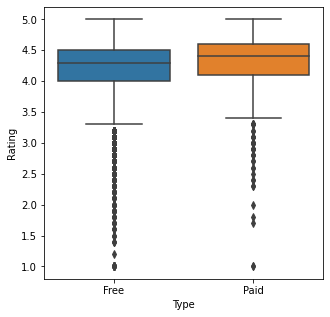

In [33]:
fig = plt.figure(figsize=(5,5))
ax = sns.boxplot(x = "Type", y = "Rating", data = df1)

<Figure size 360x360 with 0 Axes>

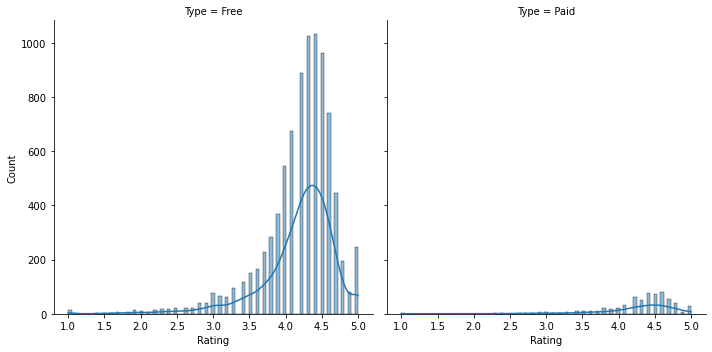

In [50]:
fig = plt.figure(figsize=(5,5))
ax = sns.displot(x = "Rating", col="Type", data = df1, kde = True)

<Figure size 10800x3600 with 0 Axes>

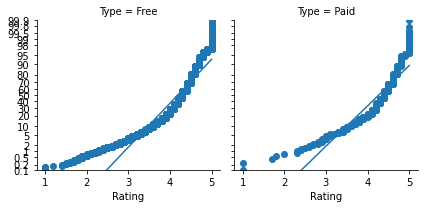

In [39]:
fig = plt.figure(figsize=(150,50))
fg = (
    seaborn.FacetGrid(data = df1, col='Type', margin_titles=True)
        .map(probscale.probplot, 'Rating', probax='y', bestfit=True)
)



3. Suy diễn
- Suy diễn thống kê cho thống kê hiện tại thuộc loại so sánh hai population mean

- Kiểm định thống kê phù hợp cho câu hỏi này là two sample t-test for two means (μ1,μ2)

- Xác định các giả thuyết

 + Null hypothesis: H0:μ1−μ2=0

 + Alternative hypothesis: HA:μ1−μ2≠0

Tính t-test, p-value

In [70]:
stats.ttest_ind(df1['Rating'][df1['Type'] == 'Free'],
                df1['Rating'][df1['Type'] == 'Paid'])

Ttest_indResult(statistic=-3.833026128831855, pvalue=0.00012740549319697654)

Dựa vào kết quả trên, two sample t-test chỉ ra rằng có bằng chứng thống kê đáng kể để kết luận rằng Rating của những ứng dụng trả phí và không trả phí là thực sự khác nhau
p-value = 0.0001
Vì p-value nhỏ hơn mức ý nghĩa α=0.05 nên ta bác bỏ H0.

4. Kết luận

 + Phân tích thăm dò cho thấy sự khác biệt về rating trung bình giữa các ứng dụng miễn phí và có trả tiền cụ thể hơn các ứng dụng trả tiền có rating trung bình cao hơn các ứng dụng miễn phí.
 + Kiểm định thống kê cho ra giá trị p rất nhỏ (về cơ bản là 0), cho thấy bằng chứng được cung cấp bởi dữ liệu đủ mạnh để bác bỏ H0 và kết luận rằng có sự khác biệt về Rating giữa các ứng dụng miễn phí và trả tiền. Điều này khá đúng với thực tế khi mà những ứng dụng trả tiền thường có dịch vụ chăm sóc khách hàng tốt hơn và trùng với mong đợi của chúng em.
 + Dữ liệu cũng như kết quả của nghiên cứu trên không đưa ra bằng chứng cho việc chúng ta cứ phát hành một ứng dụng miễn phí là rating từ người dùng sẽ thấp hơn so với ứng dụng trả tiền. Có thể hiểu sự khác biệt này là vì phần lớn người dùng đánh giá rất cao dịch vụ chăm sóc khách hàng cũng như trải nghiệm của các ứng dụng trả tiền.


CÂU 2: Ứng dụng hướng tới nhiều nhóm độ tuổi thì điểm đánh giá của nhóm nào cao nhất?
    

1. Xác định các biến có liên quan
- Biến giải thích: Content Rating, loại categorical

- Biến phản hồi: Rating, loại quantitative

2. Phân tích thăm dò (Exploratory Analysis)
  
  Vẽ biểu đồ side by side boxplots

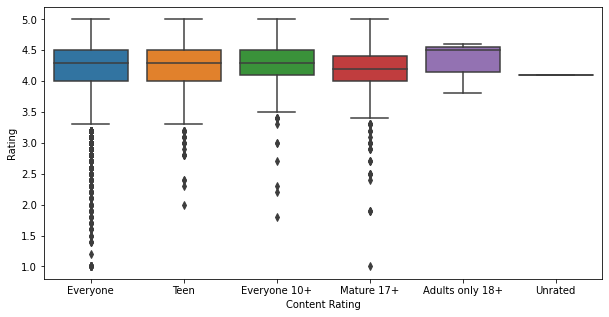

In [71]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df1['Content Rating'], df1['Rating'])
plt.show()

<Figure size 360x360 with 0 Axes>

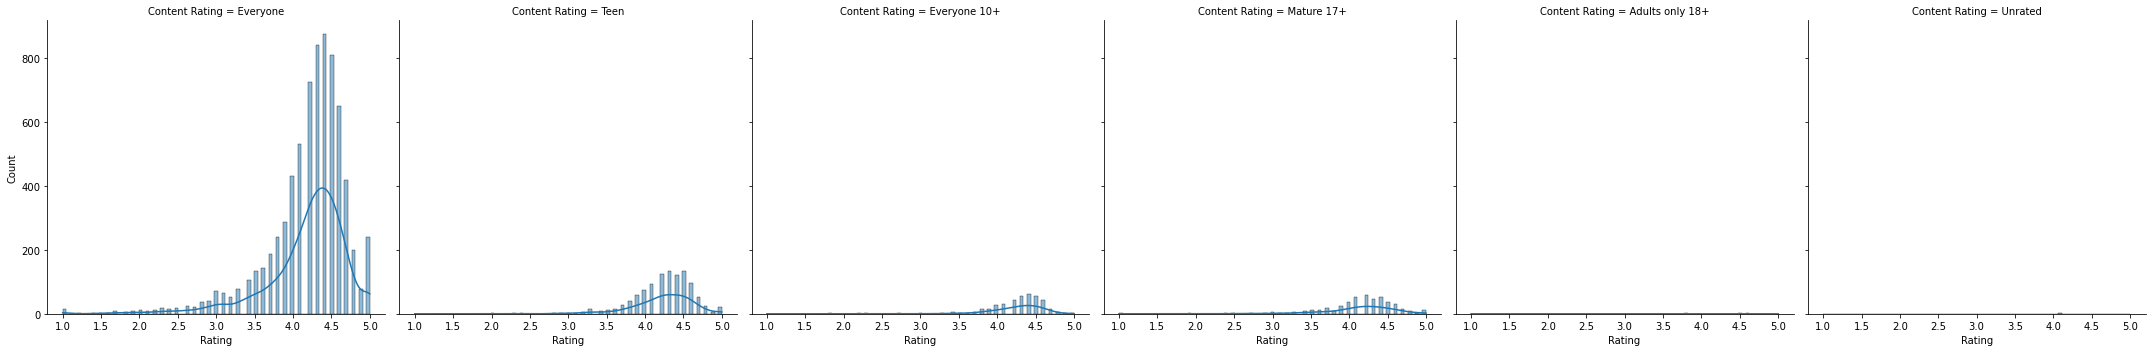

In [64]:
fig = plt.figure(figsize=(5,5))
sns.displot(x = "Rating", col= "Content Rating", data = df1, kde = True)

<Figure size 10800x3600 with 0 Axes>

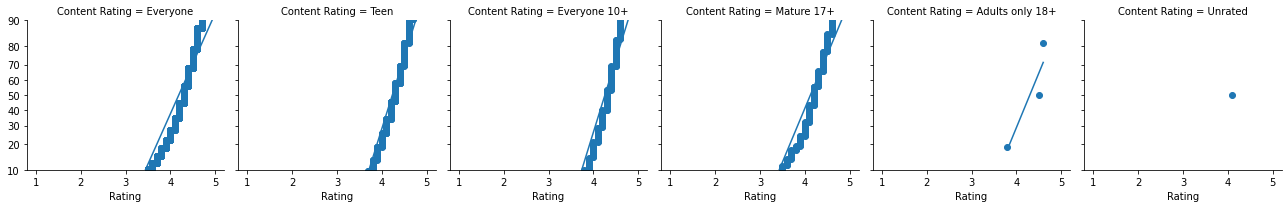

In [38]:
fig = plt.figure(figsize=(150,50))
fg = (
    seaborn.FacetGrid(data = df1, col='Content Rating', margin_titles=True)
        .map(probscale.probplot, 'Rating', probax='y', bestfit=True)
)

3. Suy diễn
- Suy diễn thống kê cho thống kê hiện tại thuộc loại so sánh nhiều hơn 2 population mean.

- Kiểm định thống kê phù hợp cho câu hỏi này là ANOVA F-test

- Xác định các giả thuyết

 + Null hypothesis: H0: Không có sự khác biệt về Rating giữa các nhóm độ tuổi khác nhau

 + Alternative hypothesis: HA:Có sự khác biệt về Rating giữa các nhóm độ tuổi khác nhau

In [110]:
aov = pg.anova(data=df1, dv='Rating', between='Content Rating', detailed=True)
print(aov)

           Source           SS    DF        MS         F     p-unc       np2
0  Content Rating     5.989854     5  1.197971  4.520687  0.000406  0.002411
1          Within  2478.786539  9354  0.264997       NaN       NaN       NaN


Dựa vào kết quả trên, ANOVA F-test chỉ ra rằng có bằng chứng thống kê đáng kể để kết luận rằng rating trung bình thực sự giữa tất cả các nhóm tuổi là không bằng nhau.
 + p-value = 0.0004
 + Vì p-value nhỏ hơn mức ý nghĩa α=0.05 nên ta bác bỏ H0.

4. Kết luận
- Phân tích thăm dò cho thấy sự khác biệt về rating trung bình giữa các lứa tuổi là khác nhau. Cụ thể hơn, ta có thể thấy các nhóm  Everyone, Teen, Everyone 10+,.. có sự khác biệt rõ ràng về mặt thống kê.
- Kiểm định thống kê cho ra giá trị p rất nhỏ (về cơ bản là 0), cho thấy bằng chứng được cung cấp bởi dữ liệu đủ mạnh để bác bỏ H0 và kết luận rằng có sự khác biệt về Rating giữa các nhóm độ tuổi khác nhau.
- Dữ liệu cũng như kết quả của nghiên cứu trên không đưa ra bằng chứng cho việc chúng ta cứ phát hành một ứng dụng đúng với lứa tuổi là rating sẽ cao, vì đây là một nghiên cứu quan sát, trường hợp duy nhất mà từ có mối quan hệ có thể suy ra nhân quả (association implies causation) là khi nghiên cứu là một thí nghiệm ngẫu nhiên tuy nhiên để thu thập được toàn bộ danh sách các ứng dụng từ CHPlay ở thời điểm hiện tại gần như là không thể, vì thế rất khó đảm bảo tính ngẫu nhiên của thí nghiệm.

## 8. Tổng kết:
- Dựa trên kết quả phân tích của chúng tôi, có bằng chứng thống kê cho thấy rằng nhóm "Everyone" có đánh giá cao nhất. Điều này có thể là do các ứng dụng dành cho mọi lứa tuổi làm hài lòng người dùng một cách tự nhiên,vì vậy nhận về rating cao. Ngoài ra còn có bằng chứng thống kê cho thấy rằng ứng dụng cửa hàng Play có sự khác biệt đáng kể về xếp hạng giữa ứng dụng miễn phí hoặc trả phí.Dành cho các nhà phát triển di động hoặc những người tìm cách phát triển các ứng dụng,ý tưởng chung cho một ứng dụng có thể giúp tăng xếp hạng trên Google Play.
- Nhược điểm của bài phân tích trên:
 + Nghiên cứu trên là một nghiên cứu quan sát, vì vậy không thể đưa ra kết luận nhân quả.
 + Rất khó để có thể dựa vào tập dữ liệu hiện có và đưa ra kết luận cho toàn bộ các ứng dụng trên Google Play đây chỉ là những ứng dụng mà ta có thể thu thập được thông tin trên các trang web và số lượng ứng dụng tăng mỗi ngày. Vì vậy việc lập danh sách toàn bộ các ứng dụng gần như là không thể, từ đó tính ngẫu nhiên của mẫu cũng không còn được đảm bảo.
 + Trong biểu đồ histogram tụi em chưa vẽ được phân phối chuẩn mà chỉ vẽ ra để coi phân bố rộng rãi của tập dữ liệu, nên tụi em vẽ thêm QQ-plot để có thể so sánh phân bố chuẩn với phân bố mẫu
 +  Hiểu biết và thời gian có hạn nên bài làm khó tránh khỏi các sai sót trong bài.